In [1]:
# Setup Env 
# conda create -n titanicsurvivalprediction python=3.8
#conda activate titanicsurvivalprediction

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('train.csv',na_values='NA')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
dataset=df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked']]

In [7]:
dataset.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C


In [8]:
print(dataset['Sex'].unique())
print(dataset['Parch'].unique())
print(dataset['Embarked'].unique())

['male' 'female']
[0 1 2 5 3 4 6]
['S' 'C' 'Q' nan]


In [9]:
dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
len(dataset)

891

In [11]:
dataset.drop(['Cabin'],axis=1,inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_17068\4045770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(['Cabin'],axis=1,inplace=True)


In [12]:
dataset.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [13]:
dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [14]:
dataset[dataset['Age'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C
863,0,3,female,NaN,8,2,69.5500,S
868,0,3,male,NaN,0,0,9.5000,S
878,0,3,male,NaN,0,0,7.8958,S


In [15]:
mean_Adult=df.loc[~(df['SibSp'].isnull()) & (df['SibSp']==0) & (df['Parch']==0),'Age'].mean()
mean_Child=df.loc[~(df['SibSp'].isnull()) & (df['SibSp']>0) | (df['Parch']>0),'Age'].mean()

In [16]:
print("Mean of Adult is {} and Child is {}".format(mean_Adult,mean_Child))

Mean of Adult is 32.22029702970297 and Child is 26.413451612903227


In [17]:
dataset.loc[df['Age'].isnull() & (df['SibSp']==0) & (df['Parch']==0),'Age']=mean_Adult

In [18]:
dataset.loc[df['Age'].isnull() & (df['SibSp']>0) | (df['Parch']>0),'Age']=mean_Child

In [19]:
dataset.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [20]:
len(dataset)

891

In [21]:
dataset.dropna(inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_17068\2639109627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.dropna(inplace=True)


In [22]:
len(dataset)

889

In [23]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [24]:
dataset.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.335549,-0.041432,-0.034040,0.083151,0.255290
Pclass,-0.335549,1.000000,-0.287181,0.081656,0.016824,-0.548193
Age,-0.041432,-0.287181,1.000000,-0.124361,-0.201189,0.013805
SibSp,-0.034040,0.081656,-0.124361,1.000000,0.414542,0.160887
Parch,0.083151,0.016824,-0.201189,0.414542,1.000000,0.217532
Fare,0.255290,-0.548193,0.013805,0.160887,0.217532,1.000000


In [25]:
dataset.drop(['Embarked'],axis=1,inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_17068\3876697036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(['Embarked'],axis=1,inplace=True)


In [26]:
dataset.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833


In [27]:
unique_Sex=list(dataset['Sex'].unique())
unique_Sex

['male', 'female']

In [28]:
dataset['Sex']=dataset['Sex'].map(lambda x : unique_Sex.index(x))

C:\Users\Hp\AppData\Local\Temp\ipykernel_17068\612398926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Sex']=dataset['Sex'].map(lambda x : unique_Sex.index(x))


In [29]:
X=dataset.iloc[:,1:]
y=dataset.iloc[:,0]

In [30]:
len(X)

889

In [31]:
len(y)

889

In [32]:
X.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

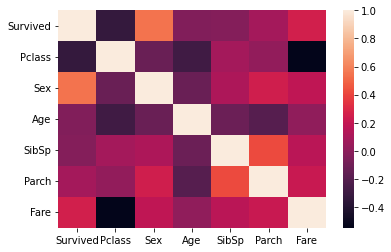

In [34]:
sns.heatmap(dataset.corr())

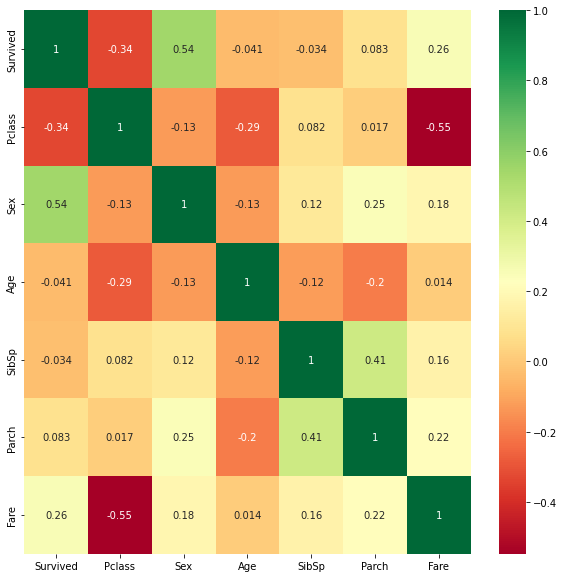

In [35]:
corrmat=dataset.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(10,10))

g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.01)

In [38]:
len(X_train)

880

In [39]:
len(X_test)

9

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [59]:
def model(train_data_X,train_data_y):
    
    model = Sequential()
    model.add(Dense(256, input_shape=(len(train_data_X.columns),), activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(56, activation='relu'))
    model.add(Dense(28, activation='relu'))
    model.add(Dense(14, activation='relu'))
    model.add(Dense(7, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [60]:
base_model=model(X_train,y_train)

In [61]:
base_model.fit(X_train,y_train,epochs=1000,batch_size=30)

Epoch 1/1000
30/30 [==============================] - 0s 1ms/step - loss: 3.2606 - accuracy: 0.6159
Epoch 2/1000
30/30 [==============================] - 0s 1ms/step - loss: 1.3946 - accuracy: 0.6182
Epoch 3/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.6447 - accuracy: 0.6568
Epoch 4/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.6058 - accuracy: 0.6705
Epoch 5/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.6056 - accuracy: 0.6750
Epoch 6/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.6034 - accuracy: 0.6693
Epoch 7/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5958 - accuracy: 0.6920
Epoch 8/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5958 - accuracy: 0.6818
Epoch 9/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5921 - accuracy: 0.6886
Epoch 10/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5871 - accuracy: 0.6761

30/30 [==============================] - 0s 1ms/step - loss: 0.4610 - accuracy: 0.7898
Epoch 83/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4607 - accuracy: 0.7830
Epoch 84/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4624 - accuracy: 0.7864
Epoch 85/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4572 - accuracy: 0.7898
Epoch 86/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4578 - accuracy: 0.7932
Epoch 87/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4590 - accuracy: 0.7909
Epoch 88/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4549 - accuracy: 0.7909
Epoch 89/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4568 - accuracy: 0.7830
Epoch 90/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4525 - accuracy: 0.7943
Epoch 91/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4580 - accuracy: 0.7920
Epoc

30/30 [==============================] - 0s 1ms/step - loss: 0.4503 - accuracy: 0.8034
Epoch 163/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4482 - accuracy: 0.7886
Epoch 164/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4474 - accuracy: 0.7977
Epoch 165/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4459 - accuracy: 0.8000
Epoch 166/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4475 - accuracy: 0.7977
Epoch 167/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4473 - accuracy: 0.7955
Epoch 168/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4435 - accuracy: 0.7932
Epoch 169/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4507 - accuracy: 0.7966
Epoch 170/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4409 - accuracy: 0.8000
Epoch 171/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4402 - accuracy: 0.

30/30 [==============================] - 0s 2ms/step - loss: 0.4451 - accuracy: 0.7898
Epoch 243/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4425 - accuracy: 0.7977
Epoch 244/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4445 - accuracy: 0.7943
Epoch 245/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4426 - accuracy: 0.7977
Epoch 246/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4423 - accuracy: 0.8045
Epoch 247/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4415 - accuracy: 0.7920
Epoch 248/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4423 - accuracy: 0.7898
Epoch 249/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4388 - accuracy: 0.8034
Epoch 250/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4439 - accuracy: 0.7932
Epoch 251/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4426 - accuracy: 0.

30/30 [==============================] - 0s 1ms/step - loss: 0.4378 - accuracy: 0.7977
Epoch 323/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4394 - accuracy: 0.7920
Epoch 324/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4384 - accuracy: 0.8057
Epoch 325/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4394 - accuracy: 0.7920
Epoch 326/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4414 - accuracy: 0.7955
Epoch 327/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4395 - accuracy: 0.7977
Epoch 328/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.4427 - accuracy: 0.8000
Epoch 329/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.4384 - accuracy: 0.8011
Epoch 330/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.4422 - accuracy: 0.7989
Epoch 331/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4406 - accuracy: 0.

30/30 [==============================] - 0s 1ms/step - loss: 0.4377 - accuracy: 0.8011
Epoch 403/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4354 - accuracy: 0.8057
Epoch 404/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.4380 - accuracy: 0.7989
Epoch 405/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4390 - accuracy: 0.8068
Epoch 406/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4381 - accuracy: 0.8000
Epoch 407/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4366 - accuracy: 0.7977
Epoch 408/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4403 - accuracy: 0.7989
Epoch 409/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4329 - accuracy: 0.7966
Epoch 410/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4397 - accuracy: 0.8034
Epoch 411/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4348 - accuracy: 0.

30/30 [==============================] - 0s 1ms/step - loss: 0.4377 - accuracy: 0.7909
Epoch 483/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4360 - accuracy: 0.7977
Epoch 484/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4381 - accuracy: 0.8045
Epoch 485/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4381 - accuracy: 0.8034
Epoch 486/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4347 - accuracy: 0.7977
Epoch 487/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4352 - accuracy: 0.8023
Epoch 488/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4326 - accuracy: 0.8011
Epoch 489/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4426 - accuracy: 0.7955
Epoch 490/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4373 - accuracy: 0.7966
Epoch 491/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4390 - accuracy: 0.

30/30 [==============================] - 0s 1ms/step - loss: 0.4370 - accuracy: 0.8034
Epoch 563/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4344 - accuracy: 0.8023
Epoch 564/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4334 - accuracy: 0.7977
Epoch 565/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4332 - accuracy: 0.8045
Epoch 566/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4358 - accuracy: 0.8034
Epoch 567/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4349 - accuracy: 0.8011
Epoch 568/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4343 - accuracy: 0.7966
Epoch 569/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4343 - accuracy: 0.7943
Epoch 570/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4302 - accuracy: 0.8136
Epoch 571/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4317 - accuracy: 0.

30/30 [==============================] - 0s 1ms/step - loss: 0.4316 - accuracy: 0.8034
Epoch 643/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4316 - accuracy: 0.8011
Epoch 644/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4342 - accuracy: 0.8034
Epoch 645/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4278 - accuracy: 0.8080
Epoch 646/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4267 - accuracy: 0.8080
Epoch 647/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4306 - accuracy: 0.8034
Epoch 648/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4315 - accuracy: 0.7955
Epoch 649/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4323 - accuracy: 0.8000
Epoch 650/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4306 - accuracy: 0.7989
Epoch 651/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4305 - accuracy: 0.

30/30 [==============================] - 0s 1ms/step - loss: 0.4307 - accuracy: 0.8068
Epoch 723/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4309 - accuracy: 0.8000
Epoch 724/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4285 - accuracy: 0.7989
Epoch 725/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4359 - accuracy: 0.8011
Epoch 726/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4269 - accuracy: 0.8068
Epoch 727/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4328 - accuracy: 0.7875
Epoch 728/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4308 - accuracy: 0.8091
Epoch 729/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4317 - accuracy: 0.8057
Epoch 730/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4298 - accuracy: 0.8091
Epoch 731/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4309 - accuracy: 0.

30/30 [==============================] - 0s 1ms/step - loss: 0.4315 - accuracy: 0.7932
Epoch 803/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4309 - accuracy: 0.8091
Epoch 804/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.4307 - accuracy: 0.8011
Epoch 805/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4273 - accuracy: 0.8057
Epoch 806/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4313 - accuracy: 0.8034
Epoch 807/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4301 - accuracy: 0.8023
Epoch 808/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4303 - accuracy: 0.8068
Epoch 809/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4285 - accuracy: 0.8080
Epoch 810/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4308 - accuracy: 0.8068
Epoch 811/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4295 - accuracy: 0.

30/30 [==============================] - 0s 2ms/step - loss: 0.4245 - accuracy: 0.8034
Epoch 883/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4278 - accuracy: 0.7966
Epoch 884/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.4274 - accuracy: 0.8068
Epoch 885/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.4273 - accuracy: 0.8102
Epoch 886/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4277 - accuracy: 0.7989
Epoch 887/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4303 - accuracy: 0.8045
Epoch 888/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4267 - accuracy: 0.8114
Epoch 889/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4286 - accuracy: 0.8034
Epoch 890/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4228 - accuracy: 0.8170
Epoch 891/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4286 - accuracy: 0.

30/30 [==============================] - 0s 2ms/step - loss: 0.4286 - accuracy: 0.7989
Epoch 963/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.4274 - accuracy: 0.7989
Epoch 964/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4295 - accuracy: 0.8068
Epoch 965/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4277 - accuracy: 0.8091
Epoch 966/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.4246 - accuracy: 0.8023
Epoch 967/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4262 - accuracy: 0.8045
Epoch 968/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.4322 - accuracy: 0.7977
Epoch 969/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4284 - accuracy: 0.8080
Epoch 970/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4306 - accuracy: 0.8091
Epoch 971/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4322 - accuracy: 0.

In [62]:
base_model.save('Titanicmodel.h5')

# from tensorflow import keras
# model = keras.models.load_model('path/to/location')

In [63]:
test_data=pd.read_csv('test.csv')
res_data=test_data

In [64]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [65]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [66]:
test_data=test_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
        'Fare']]

In [67]:
test_data.isnull().sum()

Pclass     0
Sex        0
Age       86
SibSp      0
Parch      0
Fare       1
dtype: int64

In [68]:
test_data['Sex']=test_data['Sex'].map(lambda x : unique_Sex.index(x))

C:\Users\Hp\AppData\Local\Temp\ipykernel_17068\3230059237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Sex']=test_data['Sex'].map(lambda x : unique_Sex.index(x))


In [69]:

test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,34.5,0,0,7.8292
1,3,1,47.0,1,0,7.0000
2,2,0,62.0,0,0,9.6875
3,3,0,27.0,0,0,8.6625
4,3,1,22.0,1,1,12.2875


In [70]:
mean_Adult=test_data.loc[~(test_data['SibSp'].isnull()) & (test_data['SibSp']==0) & (test_data['Parch']==0),'Age'].mean()
mean_Child=test_data.loc[~(test_data['SibSp'].isnull()) & (test_data['SibSp']>0) | (test_data['Parch']>0),'Age'].mean()


test_data.loc[test_data['Age'].isnull() & (test_data['SibSp']>0) | (test_data['Parch']>0),'Age']=mean_Child
test_data.loc[test_data['Age'].isnull() & (test_data['SibSp']==0) & (test_data['Parch']==0),'Age']=mean_Adult

In [71]:
test_data.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      1
dtype: int64

In [72]:
test_data.fillna(test_data['Fare'].mean(),inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_17068\3019302626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.fillna(test_data['Fare'].mean(),inplace=True)


In [73]:
test_data.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [74]:
predict_result=base_model.predict(test_data)

14/14 [==============================] - 0s 1ms/step


In [75]:
ans=[]
for i,j in zip(predict_result,list(res_data['PassengerId'])):
    if int(i) > 0:
        ans.append(1)
    elif int(i)<=0:
        ans.append(0)

In [76]:
df = pd.DataFrame({
                    'PassengerId': list(res_data['PassengerId']),
                    'Survived': list(ans) 
                  })

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('output_neural.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
df.to_excel(writer, sheet_name='gender_submission', index=False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()